# Lyrics Generator

In [1]:
import os
import pandas as pd

In [2]:

# Define input and output paths
folder_path = r"E:\Lyrics_Generator\Data_Sets\Songs"
output_folder = r"E:\Lyrics_Generator\Data_Sets"
output_file = os.path.join(output_folder, "merged_songs.csv")

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Get all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# Read and merge
dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
merged_df = pd.concat(dfs, ignore_index=True)

# Save to CSV
merged_df.to_csv(output_file, index=False)
print(f"Merged {len(csv_files)} CSV files into '{output_file}' successfully!")

# folder_path = "E:\AI\Lyrics_Generator_RNN\Song_dataset"

# csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
# merged_df = pd.concat(dfs, ignore_index=True)

# merged_df.to_csv(r"E:\AI\Lyrics_Generator_RNN\Data_sets\merged_songs.csv", index=False)

# print(f"Merged {len(csv_files)} CSV files into 'merged_songs.csv' successfully!")


Merged 20 CSV files into 'E:\Lyrics_Generator\Data_Sets\merged_songs.csv' successfully!


## Loading the DataSets

In [3]:
df = pd.read_csv(r"E:\Lyrics_Generator\Data_sets\merged_songs.csv")

In [4]:
df.head(3)

,Artist,Title,Album,Date,Lyric,Year,Unnamed: 0
0,Ariana Grande,"​thank u, next","thank u, next",2018-11-03,thought i'd end up with sean but he wasn't a m...,2018.0,NaN
1,Ariana Grande,7 rings,"thank u, next",2019-01-18,yeah breakfast at tiffany's and bottles of bub...,2019.0,NaN
2,Ariana Grande,​God is a woman,Sweetener,2018-07-13,you you love it how i move you you love it how...,2018.0,NaN


## Exploring the data

In [5]:
df['Artist'].value_counts()

Artist
Eminem           521
Taylor Swift     479
Drake            466
Beyoncé          406
Rihanna          405
Lady Gaga        402
Justin Bieber    348
Coldplay         344
Katy Perry       325
Nicki Minaj      323
Ariana Grande    308
Ed Sheeran       296
Dua Lipa         247
Maroon 5         197
Selena Gomez     175
Post Malone      148
Billie Eilish    145
Charlie Puth      75
Cardi B           75
Khalid            64
Name: count, dtype: int64

In [6]:
df.shape

(5749, 7)

## Checking for the missing data

In [7]:
df.isnull().sum()

Artist           0
Title            0
Album         1552
Date          1744
Lyric           38
Year          1744
Unnamed: 0     308
dtype: int64

In [8]:
df = df.drop(columns=['Album', 'Date', 'Year', 'Unnamed: 0'])

In [9]:
df.isnull().sum()

Artist     0
Title      0
Lyric     38
dtype: int64

In [10]:
df = df.dropna(subset=['Lyric'])  # Remove rows with missing lyrics
df = df.drop_duplicates()  # Remove duplicate lyrics

In [11]:
df.isnull().sum()

Artist    0
Title     0
Lyric     0
dtype: int64

In [12]:
df.shape

(5711, 3)

In [13]:
df['Artist'].value_counts()

Artist
Eminem           521
Taylor Swift     477
Drake            464
Beyoncé          406
Rihanna          397
Lady Gaga        395
Justin Bieber    347
Coldplay         333
Katy Perry       324
Nicki Minaj      321
Ariana Grande    308
Ed Sheeran       294
Dua Lipa         246
Maroon 5         197
Selena Gomez     174
Post Malone      148
Billie Eilish    145
Charlie Puth      75
Cardi B           75
Khalid            64
Name: count, dtype: int64

## Text Preprocessing

In [14]:
new_df = df.copy()

In [15]:
new_df

,Artist,Title,Lyric
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...
2,Ariana Grande,​God is a woman,you you love it how i move you you love it how...
3,Ariana Grande,Side To Side,ariana grande nicki minaj i've been here all ...
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i wanna be in...
...,...,...,...
5744,Taylor Swift,Teardrops on my Guitar (Live from Clear Channe...,drew looks at me i fake a smile so he won't se...
5745,Taylor Swift,Evermore [Forward],to put it plainly we just couldnt stop writing...
5746,Taylor Swift,Welcome Back Grunwald,turn wycd on you're on your grunwald back from...
5747,Taylor Swift,Tolerate it (Polskie Tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową p...


### Lowercasing

In [16]:
new_df['Title'] = new_df['Title'].str.lower()
new_df['Lyric'] = new_df['Lyric'].str.lower()

In [17]:
new_df.head(3)

,Artist,Title,Lyric
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...
2,Ariana Grande,​god is a woman,you you love it how i move you you love it how...


#### Cleaning functions

In [18]:
import re

In [19]:
# Pre-checking the lyrics
def has_html_tags(text):
    """Check if text contains HTML tags."""
    if not isinstance(text, str):
        return False
    return bool(re.search(r'<[^>]+>', text))

def has_urls(text):
    """Check if text contains URLs."""
    if not isinstance(text, str):
        return False
    url_pattern = r'https?://\S+|www\.\S+|\S+\.\S+/\S+'
    return bool(re.search(url_pattern, text))

# def has_punctuation(text):
#     """Check if text contains punctuation."""
#     if not isinstance(text, str):
#         return False
#     return any(c in string.punctuation for c in text)

In [20]:
# Function to remove html tags and urls
def remove_html_tags(text):
    """Remove HTML tags from text."""
    if not isinstance(text, str):
        return text
    pattern = re.compile(r'<.*?>')
    return pattern.sub('', text).strip()

def remove_urls(text):
    """Remove URLs from text."""
    if not isinstance(text, str):
        return text
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text).strip()

# def remove_punctuation(text):
#     """Remove punctuation from text."""
#     if not isinstance(text, str):
#         return text
#     return text.translate(str.maketrans('', '', string.punctuation))

In [21]:
lyric_html_count = new_df['Lyric'].apply(has_html_tags).sum()
lyric_url_count = new_df['Lyric'].apply(has_urls).sum()
# lyric_punctuation_count = new_df['Lyric'].apply(has_punctuation).sum()

# title_html_count = new_df['Title'].apply(has_html_tags).sum()
# title_url_count = new_df['Title'].apply(has_urls).sum()
# title_punctuation_count = new_df['Title'].apply(has_punctuation).sum()

total_rows = len(new_df)
print("Precheck Summary:")
print(f"Lyrics with HTML tags: {lyric_html_count} ({(lyric_html_count/total_rows)*100:.2f}%)")
print(f"Lyrics with URLs: {lyric_url_count} ({(lyric_url_count/total_rows)*100:.2f}%)")
# print(f"Lyrics with punctuation: {lyric_punctuation_count} ({(lyric_punctuation_count/total_rows)*100:.2f}%)")

# print(f"Titles with HTML tags: {title_html_count} ({(title_html_count/total_rows)*100:.2f}%)")
# print(f"Titles with URLs: {title_url_count} ({(title_url_count/total_rows)*100:.2f}%)")
# print(f"Titles with punctuation: {title_punctuation_count} ({(title_punctuation_count/total_rows)*100:.2f}%)")

Precheck Summary:
Lyrics with HTML tags: 0 (0.00%)
Lyrics with URLs: 0 (0.00%)


In [22]:
# Cleaning based on pre-check results

if lyric_html_count > 0:
    new_df['Lyric'] = new_df['Lyric'].apply(remove_html_tags)

if lyric_url_count > 0:
    new_df['Lyric'] = new_df['Lyric'].apply(remove_urls)
    
# if lyric_punctuation_count > 0:
#     new_df['Lyric'] = new_df['Lyric'].apply(remove_punctuation)

In [23]:
# Recalculate after cleaning
lyric_html_count_after = new_df['Lyric'].apply(has_html_tags).sum()
lyric_url_count_after = new_df['Lyric'].apply(has_urls).sum()
# lyric_punctuation_count_after = new_df['Lyric'].apply(has_punctuation).sum()

print("\nPost-cleaning Result:")
print(f"Lyrics with HTML tags: {lyric_html_count_after} ({(lyric_html_count_after/total_rows)*100:.2f}%)")
print(f"Lyrics with URLs: {lyric_url_count_after} ({(lyric_url_count_after/total_rows)*100:.2f}%)")
# print(f"Lyrics with punctuation: {lyric_punctuation_count_after} ({(lyric_punctuation_count_after/total_rows)*100:.2f}%)")



Post-cleaning Result:
Lyrics with HTML tags: 0 (0.00%)
Lyrics with URLs: 0 (0.00%)


In [24]:
new_df['Lyric'].head()

0    thought i'd end up with sean but he wasn't a m...
1    yeah breakfast at tiffany's and bottles of bub...
2    you you love it how i move you you love it how...
3    ariana grande  nicki minaj i've been here all ...
4    right now i'm in a state of mind i wanna be in...
Name: Lyric, dtype: object

## Chat Words Treatment

In [25]:
chat_words ={
    "u": "you",
    "ur": "your",
    "r": "are",
    "ya": "you",
    "luv": "love",
    "b4": "before",
    "gonna": "going to",
    "wanna": "want to",
    "gotta": "got to",
    "lemme": "let me",
    "gimme": "give me",
    "im": "i am",
    "dont": "don't",
    "idk": "i don't know",
    "brb": "be right back",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "ttyl": "talk to you later",
    "lmao": "laughing my ass off",
    "rofl": "rolling on the floor laughing",
    "bff": "best friends forever",
    "ily": "i love you",
    "jk": "just kidding",
    "bday": "birthday",
    "cuz": "because",
    "coz": "because",
    "thx": "thanks",
    "pls": "please",
    "plz": "please",
    "bae": "before anyone else",
    "dm": "direct message",
    "noob": "beginner",
    "sk8": "skate",
    "gr8": "great",
    "np": "no problem",
    "l8r": "later",
    "idc": "i don't care",
    "zzz": "sleeping",
    "omw": "on my way"
}

# Checking the number of lyrics containing the chat words

def contains_chat_words(text):
    if not isinstance(text, str):
        return False
    words = text.split()
    return any(word in chat_words for word in words)

# Check how many lyrics contain chat words
chat_word_count = new_df['Lyric'].apply(contains_chat_words).sum()
print(f"Number of lyrics containing chat words: {chat_word_count}")

# Removing the chat words from the lyrics

def chat_word_treatment(text):
    if not isinstance(text, str):
        return text
    words = text.split()
    normalized_words = [chat_words.get(w.lower(), w) for w in words]
    return ' '.join(normalized_words)

# Apply to the lyric column
new_df['Lyric'] = new_df['Lyric'].apply(chat_word_treatment)

chat_word_count_after = new_df['Lyric'].apply(contains_chat_words).sum()
print(f"Number of lyrics containing chat words: {chat_word_count_after}")

Number of lyrics containing chat words: 3374
Number of lyrics containing chat words: 0


## Spelling Correction

In [26]:
pip install pyspellchecker

Note: you may need to restart the kernel to use updated packages.


In [27]:
# from spellchecker import SpellChecker

# spell = SpellChecker()

# def count_misspelled_words(text):
#     if not isinstance(text, str):
#         return 0
#     words = text.split()
#     misspelled = spell.unknown(words)
#     return len(misspelled)

# total_misspelled_words = new_df['Lyric'].apply(count_misspelled_words).sum()
# print(f"Total misspelled words: {total_misspelled_words}")

# # def correct_spelling(text):
# #     if not isinstance(text, str):
# #         return text
# #     corrected_words = []
# #     for word in text.split():
# #         corrected = spell.correction(word)
# #         corrected_words.append(corrected if corrected else word)
# #     return ' '.join(corrected_words)

from spellchecker import SpellChecker

spell = SpellChecker()

# Function to return misspelled words in a text
def get_misspelled_words(text):
    if not isinstance(text, str):
        return []
    words = text.split()
    return list(spell.unknown(words))

# # create a new column with misspelled words
# new_df['Misspelled_Words'] = new_df['Lyric'].apply(get_misspelled_words)

# # Total misspelled words count
# total_misspelled_words = new_df['Misspelled_Words'].apply(len).sum()
# print(f"Total misspelled words: {total_misspelled_words}")

# # View the misspelled words only (unique across dataset)
# from itertools import chain

# all_misspelled = list(chain.from_iterable(new_df['Misspelled_Words']))
# unique_misspelled = set(all_misspelled)

# print(f"Unique misspelled words ({len(unique_misspelled)}):")
# print(unique_misspelled)

# # View the first 10 rows with their misspelled words
# print(new_df[['Misspelled_Words']].head(10))

misspelled_words = new_df['Lyric'].apply(get_misspelled_words)
total_misspelled_words = misspelled_words.apply(len).sum()
print(f"Total misspelled words: {total_misspelled_words}")

# Unique misspelled words
unique_misspelled = set(misspelled_words.explode().dropna().tolist())
print(f"Unique misspelled words ({len(unique_misspelled)}):")
print(unique_misspelled)  

new_df['Misspelled_Words'] = new_df['Lyric'].apply(get_misspelled_words)
  


Total misspelled words: 59049
Unique misspelled words (19201):
{'zamn', 'pensent', 'rkelly', 'aż', 'kreis', "speakin'", 'gheal', 'nokio', 'scullies', "dj's", 'handsfree', 'nuziali', 'ibomb', 'spendspend', "inc's", '0yearold', 'kylie', 'ezt', 'screwfaced', 'których', 'قبضارو', 'pc', 'amúgy', 'ποναει', "coughin'", 'filme', 'gösteriden', 'prisión', 'cmoon', 'ببینمآره', 'uhnn', "mill'", 'قسم', 'bude', '80yearold', 'crotchless', 'nuestro', 'tiwa', "baggin'", 'walki', 'alessia', 'یاد', 'bj', 'dih', 'beyhive', 'قوی', 'marylin', "surfsurfin'", 'ricin', 'gdragon', 'youngen', 'exgirl', 'آتاتیاناریشاردو', 'bumsee', 'naši', 'andahalf', 'bape', "bussin'", 'redet', "weakenin'", 'lamma', 'خودمو', 'dumdadeda', 'playdoh', 'outok', 'yubba', 'selftitled', 'playerhating', "chasin'", 'striptopaythebills', 'eightpage', 'starah', 'bethoven', 'pierdas', "ceilin'", 'whoagiuseppe', "posse'd", 'senin', 'tonguetied', 'valójában', 'összekaparni', 'frais', "truth'll", 'naaaaahh', 'közel', 'ii', 'wikepidia', 'kkc', 

In [28]:
new_df

,Artist,Title,Lyric,Misspelled_Words
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,"[pre, 'bout, havin', gon', ari, fuckin', yee, ..."
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,"[pre, woulda, 'em, tiffany's, atm, poppin', go..."
2,Ariana Grande,​god is a woman,you you love it how i move you you love it how...,"[pre, uniwhen, feelin', onetrack, tellin']"
3,Ariana Grande,side to side,ariana grande nicki minaj i've been here all n...,"[ariana, talkin', feelin', bitches', nothin', ..."
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i want to be ...,"[pre, 'em, lovin', turnin', pickin', livin', r..."
...,...,...,...,...
5744,Taylor Swift,teardrops on my guitar (live from clear channe...,drew looks at me i fake a smile so he won't se...,"[pre, whos, 'cause]"
5745,Taylor Swift,evermore [forward],to put it plainly we just couldnt stop writing...,"[imaginarynot, folklorian, couldnt, ive, dream..."
5746,Taylor Swift,welcome back grunwald,turn wycd on you're on your grunwald back from...,"[wycd, grunwald's, grunwald]"
5747,Taylor Swift,tolerate it (polskie tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową po...,"[nie, zostawiła, aż, gra, że, być, kolczasty, ..."


In [29]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [30]:
import re
from spellchecker import SpellChecker
from collections import Counter
from nltk.corpus import words
import nltk

In [31]:
# nltk.download('all')
# spell = SpellChecker()
# english_words = set(words.words())

# def is_contraction(word):
#     patterns = [r".*in'$", r".*n'$", r"^ain’t$", r".*’re$", r".*’ll$", r".*’t$"]
#     return any(re.match(pattern, word.lower()) for pattern in patterns)

# def is_keep_word(word):
#     patterns = [
#         r"^(yee|woo|ayy|ooh|uhh|ha|brr|skrrt|la|oh|woah)+$",  # Ad-libs and repeated syllables
#         # r".*(.)\1{2,}.*",  # Repeated letters (e.g., skrrrt, yesss)
#         # r"^[a-z]+(z|s){2,}$"  # Words ending in multiple z/s (e.g., buzzz)
#     ]
#     return any(re.match(pattern, word.lower()) for pattern in patterns)

# def is_non_english(word):
#     return bool(re.search(r'[^\x00-\x7F]', word))  # Non-ASCII characters

# def has_numbers(word):
#     return bool(re.search(r'\d', word.lower())) 

# def build_valid_words(texts, min_freq=5):
#     all_words = []
#     for text in texts:
#         if isinstance(text, str):
#             all_words.extend(text.split())
#     word_counts = Counter(all_words)
#     valid_words = set(word.lower() for word, count in word_counts.items()
#                       if count >= min_freq and not has_numbers(word) and
#                       (is_contraction(word) or is_keep_word(word)))
#     valid_words.update(word for word in english_words if not has_numbers(word))
#     return valid_words

# def build_valid_words(texts, min_freq=5):
#     all_words = []
#     for text in texts:
#         if isinstance(text, str):
#             all_words.extend(text.split())
#     word_counts = Counter(all_words)
#     valid_words = set(word.lower() for word, count in word_counts.items()
#                       if count >= min_freq and not has_numbers(word) and
#                       (is_contraction(word) or is_keep_word(word)))
#     valid_words.update(word for word in english_words if not has_numbers(word))
#     return valid_words

# def preprocess_text(text, valid_words):
#     if not isinstance(text, str):
#         return '', [], []
#     words = text.split()
#     processed_words = []
#     word_lengths = []
#     corrected_words = []
#     misspelled = (
#         'rumplestilskin', 'přijde', 'crunked', 'foreverholdagrudge', 'sneezin',
#         'seeeeat', 'boogieoogieoogie', 'therealyou', 'ventin',
#         'hahahah', 'mighta', 'mulsanne', 'chillin', 'buttdial', 'bimmer',
#         'flyest', 'bleh', 'puuuuuuuke', 'rollup', 'rosecolored'
#     )
#     for word in words:
#         word_lower = word.lower()
#         if has_numbers(word):
#             corrected_words.append(f"{word}→Removed(Number)")
#             continue
#         if word_lower in misspelled:
#             corrected_words.append(f"{word}→Removed(Misspelled)")
#             continue
#         if word_lower in valid_words or is_contraction(word) or is_keep_word(word):
#             processed_words.append(word)
#             corrected_words.append(f"{word}→None")
#         elif is_non_english(word):
#             corrected_words.append(f"{word}→Removed(Non-English)")
#             continue
#         else:
#             correction = spell.correction(word)
#             if correction and not has_numbers(correction) and correction in english_words:
#                 processed_words.append(correction)
#                 corrected_words.append(f"{word}→{correction}")
#             else:
#                 processed_words.append(word)
#                 corrected_words.append(f"{word}→None")
#     return ' '.join(processed_words), word_lengths, corrected_words


In [32]:
import re
from collections import Counter
from spellchecker import SpellChecker
from nltk.corpus import words
import nltk

# Make sure you have downloaded required nltk packages:
nltk.download('words')

spell = SpellChecker()
english_words = set(words.words())

def is_contraction(word):
    patterns = [r".*in'$", r".*n'$", r"^ain’t$", r".*’re$", r".*’ll$", r".*’t$"]
    return any(re.match(pattern, word.lower()) for pattern in patterns)

def is_keep_word(word):
    patterns = [
        r"^(yee|woo|ayy|ooh|uhh|ha|brr|skrrt|la|oh|woah)+$",  # Ad-libs and repeated syllables
        # Uncomment below if you want to allow repeated letters or endings with multiple z/s
        # r".*(.)\1{2,}.*",  # Repeated letters (e.g., skrrrt, yesss)
        # r"^[a-z]+(z|s){2,}$"  # Words ending in multiple z/s (e.g., buzzz)
    ]
    return any(re.match(pattern, word.lower()) for pattern in patterns)

def is_non_english(word):
    return bool(re.search(r'[^\x00-\x7F]', word))  # Contains non-ASCII

def has_numbers(word):
    return bool(re.search(r'\d', word))

def build_valid_words(texts, min_freq=5):
    all_words = []
    for text in texts:
        if isinstance(text, str):
            all_words.extend(text.split())
    word_counts = Counter(all_words)
    valid_words = set(word.lower() for word, count in word_counts.items()
                      if count >= min_freq and not has_numbers(word) and
                      (is_contraction(word) or is_keep_word(word)))
    valid_words.update(word for word in english_words if not has_numbers(word))
    return valid_words

def preprocess_text(text, valid_words):
    if not isinstance(text, str):
        return '', [], []
    words_in_text = text.split()
    processed_words = []
    word_lengths = []
    corrected_words = []

    for word in words_in_text:
        word_lower = word.lower()
        if has_numbers(word):
            corrected_words.append(f"{word}→Removed(Number)")
            continue  # Remove words with numbers

        if is_non_english(word):
            corrected_words.append(f"{word}→Removed(Non-English)")
            continue  # Remove non-English words

        # Check spelling using SpellChecker
        misspelled_set = spell.unknown([word_lower])

        if word_lower in valid_words or is_contraction(word) or is_keep_word(word):
            # Word is valid or allowed contraction/slang
            processed_words.append(word)
            corrected_words.append(f"{word}→None")
        elif misspelled_set:
            # Word is misspelled - try to correct
            correction = spell.correction(word_lower)
            if correction and correction in english_words and not has_numbers(correction):
                processed_words.append(correction)
                corrected_words.append(f"{word}→{correction}")
            else:
                # Can't correct - remove word
                corrected_words.append(f"{word}→Removed(Misspelled)")
        else:
            # Word is spelled correctly but not in valid_words (rare)
            processed_words.append(word)
            corrected_words.append(f"{word}→None")

    return ' '.join(processed_words), word_lengths, corrected_words


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [33]:
texts = [
    "I nothin' ridin' ain't goooogle sevan books| gonna rumplestilskin', 'přijde', 'crunked', 'foreverholdagrudge'let this crunked night stop me!",
    "Yee skrrt ayy woo ooh ha brr",
    "This is a test oaky sentence with some स्क्रिप्ट विशेषता rumplestilskin chillin 6ty in my bimmer misspelled wrds and numbers 1234."
]

valid_words_test = build_valid_words(texts)

for t in texts:
    processed_text, lengths, corrections = preprocess_text(t, valid_words_test)
    print("Original:", t)
    print("Processed:", processed_text)
    print("Corrections:", corrections)
    print()

Original: I nothin' ridin' ain't goooogle sevan books| gonna rumplestilskin', 'přijde', 'crunked', 'foreverholdagrudge'let this crunked night stop me!
Processed: I nothin' ridin' ain't seven gonna this cranked night stop me
Corrections: ['I→None', "nothin'→None", "ridin'→None", "ain't→None", 'goooogle→Removed(Misspelled)', 'sevan→seven', 'books|→Removed(Misspelled)', 'gonna→None', "rumplestilskin',→Removed(Misspelled)", "'přijde',→Removed(Non-English)", "'crunked',→Removed(Misspelled)", "'foreverholdagrudge'let→Removed(Misspelled)", 'this→None', 'crunked→cranked', 'night→None', 'stop→None', 'me!→me']

Original: Yee skrrt ayy woo ooh ha brr
Processed: Yee skrrt ayy woo ooh ha brr
Corrections: ['Yee→None', 'skrrt→None', 'ayy→None', 'woo→None', 'ooh→None', 'ha→None', 'brr→None']

Original: This is a test oaky sentence with some स्क्रिप्ट विशेषता rumplestilskin chillin 6ty in my bimmer misspelled wrds and numbers 1234.
Processed: This is a test oaky sentence with some chilling in my simmer

In [34]:
valid_words = build_valid_words(new_df['Lyric'], min_freq=5)
print('done')

done


In [35]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [36]:
# from tqdm import tqdm
# tqdm.pandas()  # enable progress_apply with tqdm

# # Processing function that filters lyrics if misspelled words exist
# def process_if_misspelled(row):
#     if row['Misspelled_Words']:  # if list not empty
#         return preprocess_text(row['Lyric'], valid_words)[0]  # filtered text only
#     else:
#         return row['Lyric']  # no change


# new_df['Lyric_Filtered'] = new_df.progress_apply(process_if_misspelled, axis=1)
# new_df.to_pickle('processed_lyrics.pkl')  

# # On future runs, skip above lines and just load:
# # new_df = pd.read_pickle('processed_lyrics.pkl') 

In [37]:
print(new_df.columns)


Index(['Artist', 'Title', 'Lyric', 'Misspelled_Words'], dtype='object')


In [38]:
new_df = pd.read_pickle('processed_lyrics.pkl') 

In [39]:
print(new_df.columns)


Index(['Artist', 'Title', 'Lyric', 'Misspelled_Words', 'Lyric_Filtered'], dtype='object')


### Export into new CSV file

In [40]:
new_df.to_csv(r"E:\Lyrics_Generator\Data_Sets\lyric_filtered.csv", index=False)

print("Filtered lyrics saved to 'filtered_songs.csv' successfully!")

Filtered lyrics saved to 'filtered_songs.csv' successfully!


### Loading the filtered DataSet

In [41]:
filtered_df = pd.read_csv(r"E:\Lyrics_Generator\Data_Sets\lyric_filtered.csv")

filtered_df.head(3)

,Artist,Title,Lyric,Misspelled_Words,Lyric_Filtered
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,"[""nothin'"", ""havin'"", 'ari', 'pre', ""'bout"", '...",thought i'd end up with sean but he wasn't a m...
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,"['redbottoms', ""tiffany's"", ""gleamin'"", ""looki...",yeah breakfast at tiffany and bottles of bubbl...
2,Ariana Grande,​god is a woman,you you love it how i move you you love it how...,"[""feelin'"", 'pre', 'uniwhen', 'onetrack', ""tel...",you you love it how i move you you love it how...


In [42]:
filtered_df.shape

(5711, 5)

In [43]:
filtered_df.isnull().sum()

Artist              0
Title               0
Lyric               0
Misspelled_Words    0
Lyric_Filtered      2
dtype: int64

In [44]:
# null_row = filtered_df[filtered_df['Lyric_Filtered'].isnull()]
# print(null_row)


In [45]:
## Drop the rows with null values in 'Lyric_Filtered'
filtered_df = filtered_df.dropna(subset=['Lyric_Filtered'])


In [46]:
filtered_df.isnull().sum()

Artist              0
Title               0
Lyric               0
Misspelled_Words    0
Lyric_Filtered      0
dtype: int64

In [47]:
filtered_df.shape

(5709, 5)

In [48]:
import re

# Function to detect words that are numbers or contain numbers
def has_numbers_in_words(text):
    if not isinstance(text, str):
        return False
    words = text.split()
    for word in words:
        if word.isdigit() or re.search(r'\d', word):
            return True
    return False

contains_numbers = filtered_df['Lyric_Filtered'].apply(has_numbers_in_words)

# Check how many rows have such words
print(f"Rows with numeric words: {contains_numbers.sum()}")

numeric_rows = filtered_df[contains_numbers]
print(numeric_rows[['Lyric_Filtered']])


Rows with numeric words: 41
                                         Lyric_Filtered
92    refrain i'll love you till i die boy every day...
116   jamie is over and jamie is gone jamie's decide...
242                                      released in 09
379   i tried to change closed my mouth more tried t...
445   i'm so in love i'm still in love i never met l...
515   it's what you do it's what you see i know if i...
547   i always loved you even though you did me wron...
707   i tried to change closed my mouth more tried t...
756   lights out you're not here holding me i count ...
808   i want to be alone alone with you does that ma...
842   i want to be alone alone with you does that ma...
849   i want to be alone alone with you does that ma...
1143  one two three will i ran away from you that's ...
1152  it could be worse i could be alone i could be ...
1184  have yourself a merry little christmas let you...
1238  tracy died soon after a long fought civil war ...
1287  00 yellow 00 c

In [49]:
def remove_number_words(text):
    if not isinstance(text, str):
        return text
    return ' '.join(word for word in text.split() if not re.search(r'\d', word))

# Remove number-containing words only in those rows
filtered_df.loc[contains_numbers, 'Lyric_Filtered'] = filtered_df.loc[contains_numbers, 'Lyric_Filtered'].apply(remove_number_words)

print("Removed words containing numbers from Lyric_Filtered.")

Removed words containing numbers from Lyric_Filtered.


In [50]:
contains_numbers = filtered_df['Lyric_Filtered'].apply(has_numbers_in_words)

# Check how many rows have such words
print(f"Rows with numeric words: {contains_numbers.sum()}")

Rows with numeric words: 0


In [51]:
misspelled_words = filtered_df['Lyric_Filtered'].apply(get_misspelled_words)
total_misspelled_words = misspelled_words.apply(len).sum()
print(f"Total misspelled words: {total_misspelled_words}")



Total misspelled words: 17009


In [52]:
print(misspelled_words)

0                   [gon', fuckin', yee, havin', nothin']
1       [gon', poppin', gleamin', watchin', beamin', l...
2                                      [feelin', tellin']
3       [walkin', talkin', feelin', makin', nothin', c...
4       [lovin', turnin', pickin', livin', rainin', vi...
                              ...                        
5706                                                   []
5707                                                   []
5708                                                   []
5709                                       [sie, za, gra]
5710                                                   []
Name: Lyric_Filtered, Length: 5709, dtype: object


In [53]:
filtered_df['Filtered_Misspelled_Words'] = misspelled_words

In [54]:
filtered_df

,Artist,Title,Lyric,Misspelled_Words,Lyric_Filtered,Filtered_Misspelled_Words
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,"[""nothin'"", ""havin'"", 'ari', 'pre', ""'bout"", '...",thought i'd end up with sean but he wasn't a m...,"[gon', fuckin', yee, havin', nothin']"
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,"['redbottoms', ""tiffany's"", ""gleamin'"", ""looki...",yeah breakfast at tiffany and bottles of bubbl...,"[gon', poppin', gleamin', watchin', beamin', l..."
2,Ariana Grande,​god is a woman,you you love it how i move you you love it how...,"[""feelin'"", 'pre', 'uniwhen', 'onetrack', ""tel...",you you love it how i move you you love it how...,"[feelin', tellin']"
3,Ariana Grande,side to side,ariana grande nicki minaj i've been here all n...,"[""feelin'"", 'minime', 'minaj', ""'em"", ""makin'""...",grand nick mina i've been here all night i've ...,"[walkin', talkin', feelin', makin', nothin', c..."
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i want to be ...,"[""turnin'"", ""comin'"", 'pre', ""pickin'"", ""lovin...",right now i'm in a state of mind i want to be ...,"[lovin', turnin', pickin', livin', rainin', vi..."
...,...,...,...,...,...,...
5706,Taylor Swift,teardrops on my guitar (live from clear channe...,drew looks at me i fake a smile so he won't se...,"['pre', ""'cause"", 'whos']",drew looks at me i fake a smile so he won't se...,[]
5707,Taylor Swift,evermore [forward],to put it plainly we just couldnt stop writing...,"['folklorian', 'couldnt', 'oneoff', 'imaginary...",to put it plainly we just stop writing songs t...,[]
5708,Taylor Swift,welcome back grunwald,turn wycd on you're on your grunwald back from...,"['grunwald', ""grunwald's"", 'wycd']",turn wynd on you're on your back from the amaz...,[]
5709,Taylor Swift,tolerate it (polskie tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową po...,"['jeśli', 'jak', 'czekam', 'cię', 'głową', 'ko...",i jam z i jail z eczema i co i zero nice type ...,"[sie, za, gra]"


## Tokenization

In [55]:
# Custom Tokenization
import re

def custom_tokenize(text):
    # pattern = r"\b\w+(?:'\w+)?'?|\S"
    # pattern = r"\b\w+(?:'\w+)?'?|[.,!?']"
    pattern = r"\b[a-zA-Z]+(?:'[a-zA-Z]+)?'?|[.,!?']"


    return re.findall(pattern, text)

filtered_df['Tokenized_Lyric'] = filtered_df['Lyric_Filtered'].apply(custom_tokenize)


In [56]:
filtered_df['Tokenized_Lyric']

0       [thought, i'd, end, up, with, sean, but, he, w...
1       [yeah, breakfast, at, tiffany, and, bottles, o...
2       [you, you, love, it, how, i, move, you, you, l...
3       [grand, nick, mina, i've, been, here, all, nig...
4       [right, now, i'm, in, a, state, of, mind, i, w...
                              ...                        
5706    [drew, looks, at, me, i, fake, a, smile, so, h...
5707    [to, put, it, plainly, we, just, stop, writing...
5708    [turn, wynd, on, you're, on, your, back, from,...
5709    [i, jam, z, i, jail, z, eczema, i, co, i, zero...
5710    [trying, just, like, they, say, just, taking, ...
Name: Tokenized_Lyric, Length: 5709, dtype: object

In [57]:
# test
text = "hi, how're you?!@#$%^&*()_+=//"
print(custom_tokenize(text))

['hi', ',', "how're", 'you', '?', '!']


In [58]:
filtered_df

,Artist,Title,Lyric,Misspelled_Words,Lyric_Filtered,Filtered_Misspelled_Words,Tokenized_Lyric
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,"[""nothin'"", ""havin'"", 'ari', 'pre', ""'bout"", '...",thought i'd end up with sean but he wasn't a m...,"[gon', fuckin', yee, havin', nothin']","[thought, i'd, end, up, with, sean, but, he, w..."
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,"['redbottoms', ""tiffany's"", ""gleamin'"", ""looki...",yeah breakfast at tiffany and bottles of bubbl...,"[gon', poppin', gleamin', watchin', beamin', l...","[yeah, breakfast, at, tiffany, and, bottles, o..."
2,Ariana Grande,​god is a woman,you you love it how i move you you love it how...,"[""feelin'"", 'pre', 'uniwhen', 'onetrack', ""tel...",you you love it how i move you you love it how...,"[feelin', tellin']","[you, you, love, it, how, i, move, you, you, l..."
3,Ariana Grande,side to side,ariana grande nicki minaj i've been here all n...,"[""feelin'"", 'minime', 'minaj', ""'em"", ""makin'""...",grand nick mina i've been here all night i've ...,"[walkin', talkin', feelin', makin', nothin', c...","[grand, nick, mina, i've, been, here, all, nig..."
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i want to be ...,"[""turnin'"", ""comin'"", 'pre', ""pickin'"", ""lovin...",right now i'm in a state of mind i want to be ...,"[lovin', turnin', pickin', livin', rainin', vi...","[right, now, i'm, in, a, state, of, mind, i, w..."
...,...,...,...,...,...,...,...
5706,Taylor Swift,teardrops on my guitar (live from clear channe...,drew looks at me i fake a smile so he won't se...,"['pre', ""'cause"", 'whos']",drew looks at me i fake a smile so he won't se...,[],"[drew, looks, at, me, i, fake, a, smile, so, h..."
5707,Taylor Swift,evermore [forward],to put it plainly we just couldnt stop writing...,"['folklorian', 'couldnt', 'oneoff', 'imaginary...",to put it plainly we just stop writing songs t...,[],"[to, put, it, plainly, we, just, stop, writing..."
5708,Taylor Swift,welcome back grunwald,turn wycd on you're on your grunwald back from...,"['grunwald', ""grunwald's"", 'wycd']",turn wynd on you're on your back from the amaz...,[],"[turn, wynd, on, you're, on, your, back, from,..."
5709,Taylor Swift,tolerate it (polskie tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową po...,"['jeśli', 'jak', 'czekam', 'cię', 'głową', 'ko...",i jam z i jail z eczema i co i zero nice type ...,"[sie, za, gra]","[i, jam, z, i, jail, z, eczema, i, co, i, zero..."


In [59]:
# joining tokenized lyrics for vectorization
filtered_df['Joined_Lyric'] = filtered_df['Tokenized_Lyric'].apply(lambda tokens: ' '.join(tokens))
filtered_df['Joined_Lyric']

0       thought i'd end up with sean but he wasn't a m...
1       yeah breakfast at tiffany and bottles of bubbl...
2       you you love it how i move you you love it how...
3       grand nick mina i've been here all night i've ...
4       right now i'm in a state of mind i want to be ...
                              ...                        
5706    drew looks at me i fake a smile so he won't se...
5707    to put it plainly we just stop writing songs t...
5708    turn wynd on you're on your back from the amaz...
5709    i jam z i jail z eczema i co i zero nice type ...
5710    trying just like they say just taking the step...
Name: Joined_Lyric, Length: 5709, dtype: object

In [60]:
misspelled_in_joined = filtered_df['Joined_Lyric'].apply(get_misspelled_words)
print(misspelled_in_joined)
print(misspelled_in_joined.apply(len).sum())

0                   [gon', fuckin', yee, havin', nothin']
1       [gon', poppin', gleamin', watchin', beamin', l...
2                                      [feelin', tellin']
3       [walkin', talkin', feelin', makin', nothin', c...
4       [lovin', turnin', pickin', livin', rainin', vi...
                              ...                        
5706                                                   []
5707                                                   []
5708                                                   []
5709                                       [sie, za, gra]
5710                                                   []
Name: Joined_Lyric, Length: 5709, dtype: object
17009


In [61]:
# Unique misspelled words
unique_misspelled = set(misspelled_in_joined.explode().dropna().tolist())
print(f"Unique misspelled words ({len(unique_misspelled)}):")
print(unique_misspelled)

Unique misspelled words (2081):
{"guzzlin'", 'hahahahahahahahaha', 'kreis', "speakin'", "scoffin'", "missin'", "saggin'", "coughin'", "overseein'", 'sil', 'nig', "bullyin'", "brandin'", "clinkin'", "appealin'", "extendin'", "baggin'", 'oohoh', "amazin'", "breathin'", 'nace', "abidin'", "surfsurfin'", 'ricin', "hackin'", 'jiggy', "cacklin'", "weakenin'", "bussin'", "multitaskin'", "recordin'", "chasin'", "colorin'", "ceilin'", 'aeroplane', 'hacky', "complainin'", "starvin'", 'truthteller', 'fantastico', "pinchin'", "saidnothin'", "hijackin'", "debatin'", 'woahohohohohohoh', 'shippy', "suffocatin'", 'scarface', "sellin'", "detonatin'", "boppin'", "jigglin'", "sniffin'", "dryin'", "buildin'", "fiendin'", "shoutin'", "livin'", "joggin'", 'gally', "bleachin'", "cryin'", "survivin'", "stylin'", "icegrillin'", "gangbangin'", "perpin'", "harmin'", 'neverland', "envisionin'", "balancin'", "haltin'", "foldin'", 'oxy', "comin'", 'haddie', 'trappy', "patrollin'", "seasonin'", "growlin'", "wanderin

## Lemmatization

In [62]:
from nltk.corpus import wordnet
from nltk.corpus import wordnet
from nltk.tag import pos_tag

lemmatizer = nltk.WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun

def lemmatize_tokens_with_pos(token_list):
    pos_tags = pos_tag(token_list)
    return [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags]


In [63]:
example_tokens = ['running', 'ran', 'eats', 'eating', 'cars', 'better', 'wolves', 'children']

lemmatized = lemmatize_tokens_with_pos(example_tokens)
print("Original:", example_tokens)
print("Lemmatized:", lemmatized)

Original: ['running', 'ran', 'eats', 'eating', 'cars', 'better', 'wolves', 'children']
Lemmatized: ['run', 'ran', 'eats', 'eat', 'car', 'well', 'wolf', 'child']


In [64]:
filtered_df.columns.to_list()

['Artist',
 'Title',
 'Lyric',
 'Misspelled_Words',
 'Lyric_Filtered',
 'Filtered_Misspelled_Words',
 'Tokenized_Lyric',
 'Joined_Lyric']

In [65]:
filtered_df['Lemmatized_Tokens'] = filtered_df['Tokenized_Lyric'].apply(lemmatize_tokens_with_pos)

In [66]:
filtered_df

,Artist,Title,Lyric,Misspelled_Words,Lyric_Filtered,Filtered_Misspelled_Words,Tokenized_Lyric,Joined_Lyric,Lemmatized_Tokens
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,"[""nothin'"", ""havin'"", 'ari', 'pre', ""'bout"", '...",thought i'd end up with sean but he wasn't a m...,"[gon', fuckin', yee, havin', nothin']","[thought, i'd, end, up, with, sean, but, he, w...",thought i'd end up with sean but he wasn't a m...,"[thought, i'd, end, up, with, sean, but, he, w..."
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,"['redbottoms', ""tiffany's"", ""gleamin'"", ""looki...",yeah breakfast at tiffany and bottles of bubbl...,"[gon', poppin', gleamin', watchin', beamin', l...","[yeah, breakfast, at, tiffany, and, bottles, o...",yeah breakfast at tiffany and bottles of bubbl...,"[yeah, breakfast, at, tiffany, and, bottle, of..."
2,Ariana Grande,​god is a woman,you you love it how i move you you love it how...,"[""feelin'"", 'pre', 'uniwhen', 'onetrack', ""tel...",you you love it how i move you you love it how...,"[feelin', tellin']","[you, you, love, it, how, i, move, you, you, l...",you you love it how i move you you love it how...,"[you, you, love, it, how, i, move, you, you, l..."
3,Ariana Grande,side to side,ariana grande nicki minaj i've been here all n...,"[""feelin'"", 'minime', 'minaj', ""'em"", ""makin'""...",grand nick mina i've been here all night i've ...,"[walkin', talkin', feelin', makin', nothin', c...","[grand, nick, mina, i've, been, here, all, nig...",grand nick mina i've been here all night i've ...,"[grand, nick, mina, i've, be, here, all, night..."
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i want to be ...,"[""turnin'"", ""comin'"", 'pre', ""pickin'"", ""lovin...",right now i'm in a state of mind i want to be ...,"[lovin', turnin', pickin', livin', rainin', vi...","[right, now, i'm, in, a, state, of, mind, i, w...",right now i'm in a state of mind i want to be ...,"[right, now, i'm, in, a, state, of, mind, i, w..."
...,...,...,...,...,...,...,...,...,...
5706,Taylor Swift,teardrops on my guitar (live from clear channe...,drew looks at me i fake a smile so he won't se...,"['pre', ""'cause"", 'whos']",drew looks at me i fake a smile so he won't se...,[],"[drew, looks, at, me, i, fake, a, smile, so, h...",drew looks at me i fake a smile so he won't se...,"[drew, look, at, me, i, fake, a, smile, so, he..."
5707,Taylor Swift,evermore [forward],to put it plainly we just couldnt stop writing...,"['folklorian', 'couldnt', 'oneoff', 'imaginary...",to put it plainly we just stop writing songs t...,[],"[to, put, it, plainly, we, just, stop, writing...",to put it plainly we just stop writing songs t...,"[to, put, it, plainly, we, just, stop, write, ..."
5708,Taylor Swift,welcome back grunwald,turn wycd on you're on your grunwald back from...,"['grunwald', ""grunwald's"", 'wycd']",turn wynd on you're on your back from the amaz...,[],"[turn, wynd, on, you're, on, your, back, from,...",turn wynd on you're on your back from the amaz...,"[turn, wynd, on, you're, on, your, back, from,..."
5709,Taylor Swift,tolerate it (polskie tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową po...,"['jeśli', 'jak', 'czekam', 'cię', 'głową', 'ko...",i jam z i jail z eczema i co i zero nice type ...,"[sie, za, gra]","[i, jam, z, i, jail, z, eczema, i, co, i, zero...",i jam z i jail z eczema i co i zero nice type ...,"[i, jam, z, i, jail, z, eczema, i, co, i, zero..."


In [67]:
filtered_df['Lemmatized_Text'] = filtered_df['Lemmatized_Tokens'].apply(lambda tokens: ' '.join(tokens))

In [68]:
filtered_df

,Artist,Title,Lyric,Misspelled_Words,Lyric_Filtered,Filtered_Misspelled_Words,Tokenized_Lyric,Joined_Lyric,Lemmatized_Tokens,Lemmatized_Text
0,Ariana Grande,"​thank u, next",thought i'd end up with sean but he wasn't a m...,"[""nothin'"", ""havin'"", 'ari', 'pre', ""'bout"", '...",thought i'd end up with sean but he wasn't a m...,"[gon', fuckin', yee, havin', nothin']","[thought, i'd, end, up, with, sean, but, he, w...",thought i'd end up with sean but he wasn't a m...,"[thought, i'd, end, up, with, sean, but, he, w...",thought i'd end up with sean but he wasn't a m...
1,Ariana Grande,7 rings,yeah breakfast at tiffany's and bottles of bub...,"['redbottoms', ""tiffany's"", ""gleamin'"", ""looki...",yeah breakfast at tiffany and bottles of bubbl...,"[gon', poppin', gleamin', watchin', beamin', l...","[yeah, breakfast, at, tiffany, and, bottles, o...",yeah breakfast at tiffany and bottles of bubbl...,"[yeah, breakfast, at, tiffany, and, bottle, of...",yeah breakfast at tiffany and bottle of bubble...
2,Ariana Grande,​god is a woman,you you love it how i move you you love it how...,"[""feelin'"", 'pre', 'uniwhen', 'onetrack', ""tel...",you you love it how i move you you love it how...,"[feelin', tellin']","[you, you, love, it, how, i, move, you, you, l...",you you love it how i move you you love it how...,"[you, you, love, it, how, i, move, you, you, l...",you you love it how i move you you love it how...
3,Ariana Grande,side to side,ariana grande nicki minaj i've been here all n...,"[""feelin'"", 'minime', 'minaj', ""'em"", ""makin'""...",grand nick mina i've been here all night i've ...,"[walkin', talkin', feelin', makin', nothin', c...","[grand, nick, mina, i've, been, here, all, nig...",grand nick mina i've been here all night i've ...,"[grand, nick, mina, i've, be, here, all, night...",grand nick mina i've be here all night i've be...
4,Ariana Grande,​​no tears left to cry,right now i'm in a state of mind i want to be ...,"[""turnin'"", ""comin'"", 'pre', ""pickin'"", ""lovin...",right now i'm in a state of mind i want to be ...,"[lovin', turnin', pickin', livin', rainin', vi...","[right, now, i'm, in, a, state, of, mind, i, w...",right now i'm in a state of mind i want to be ...,"[right, now, i'm, in, a, state, of, mind, i, w...",right now i'm in a state of mind i want to be ...
...,...,...,...,...,...,...,...,...,...,...
5706,Taylor Swift,teardrops on my guitar (live from clear channe...,drew looks at me i fake a smile so he won't se...,"['pre', ""'cause"", 'whos']",drew looks at me i fake a smile so he won't se...,[],"[drew, looks, at, me, i, fake, a, smile, so, h...",drew looks at me i fake a smile so he won't se...,"[drew, look, at, me, i, fake, a, smile, so, he...",drew look at me i fake a smile so he won't see...
5707,Taylor Swift,evermore [forward],to put it plainly we just couldnt stop writing...,"['folklorian', 'couldnt', 'oneoff', 'imaginary...",to put it plainly we just stop writing songs t...,[],"[to, put, it, plainly, we, just, stop, writing...",to put it plainly we just stop writing songs t...,"[to, put, it, plainly, we, just, stop, write, ...",to put it plainly we just stop write song to t...
5708,Taylor Swift,welcome back grunwald,turn wycd on you're on your grunwald back from...,"['grunwald', ""grunwald's"", 'wycd']",turn wynd on you're on your back from the amaz...,[],"[turn, wynd, on, you're, on, your, back, from,...",turn wynd on you're on your back from the amaz...,"[turn, wynd, on, you're, on, your, back, from,...",turn wynd on you're on your back from the amaz...
5709,Taylor Swift,tolerate it (polskie tłumaczenie),zwrotka siedzę i patrzę jak czytasz z głową po...,"['jeśli', 'jak', 'czekam', 'cię', 'głową', 'ko...",i jam z i jail z eczema i co i zero nice type ...,"[sie, za, gra]","[i, jam, z, i, jail, z, eczema, i, co, i, zero...",i jam z i jail z eczema i co i zero nice type ...,"[i, jam, z, i, jail, z, eczema, i, co, i, zero...",i jam z i jail z eczema i co i zero nice type ...


## Feature Engineering

In [75]:
# Creating a mapping dictionary from artist to genre
genre_map = {
    'Eminem': 'Hip Hop / Rap',
    'Taylor Swift': 'Pop / Country / Synthpop',
    'Drake': 'Hip Hop / Rap / R&B',
    'Beyoncé': 'R&B / Pop / Hip Hop',
    'Rihanna': 'Pop / R&B / Dancehall',
    'Lady Gaga': 'Pop / Dance / Electronic',
    'Justin Bieber': 'Pop / R&B',
    'Coldplay': 'Alternative Rock / Pop Rock',
    'Katy Perry': 'Pop',
    'Nicki Minaj': 'Hip Hop / Rap / Pop',
    'Ariana Grande': 'Pop / R&B',
    'Ed Sheeran': 'Pop / Folk Pop',
    'BTS (방탄소년단)': 'K-pop / Pop / Hip Hop',
    'Dua Lipa': 'Pop / Dance / Disco',
    'Maroon 5': 'Pop Rock / Funk Pop',
    'Selena Gomez': 'Pop / Dance Pop',
    'Post Malone': 'Hip Hop / Pop / Trap',
    'Billie Eilish': 'Alternative / Pop / Electropop',
    'Charlie Puth': 'Pop / R&B',
    'Cardi B': 'Hip Hop / Rap',
    'Khalid': 'R&B / Pop / Soul'
}

In [76]:
from sklearn.preprocessing import MultiLabelBinarizer

# Add genre mapping to filtered_df
filtered_df['Genre'] = filtered_df['Artist'].map(genre_map)

In [77]:
missing_genres = filtered_df['Genre'].isnull().sum()
print(f"Number of rows with missing genres: {missing_genres}")

Number of rows with missing genres: 0


In [78]:
# Step 2: Handle any artists not in the mapping
missing_genres = filtered_df['Genre'].isnull().sum()
print(f"Artists without genre mapping: {missing_genres}")

if missing_genres > 0:
    print("Artists missing genres:")
    print(filtered_df[filtered_df['Genre'].isnull()]['Artist'].unique())
    # Fill missing genres with 'Unknown'
    filtered_df['Genre'] = filtered_df['Genre'].fillna('Unknown')

# Step 3: Split genres into lists for one-hot encoding
filtered_df['Genre_List'] = filtered_df['Genre'].apply(
    lambda x: [genre.strip() for genre in x.split('/')] if x != 'Unknown' else ['Unknown']
)

# Step 4: Perform one-hot encoding using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(filtered_df['Genre_List'])

# Step 5: Create a DataFrame with the one-hot encoded genres (no prefix)
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=filtered_df.index)

# Step 6: Clean column names (replace spaces and slashes with underscores, but no prefix)
genre_df.columns = [col.replace(' ', '_').replace('/', '_') for col in genre_df.columns]

# Step 7: Add the one-hot encoded columns directly to filtered_df
for col in genre_df.columns:
    filtered_df[col] = genre_df[col]

# Display the results
print("\nDataFrame with genres added:")
print(filtered_df[['Artist', 'Genre', 'Genre_List']].head())

print(f"\nShape of updated filtered_df: {filtered_df.shape}")

print(f"\nGenre columns added to filtered_df: {list(genre_df.columns)}")

print("\nSample of one-hot encoded genres:")
print(filtered_df[['Artist'] + list(genre_df.columns)].head())

# Check the distribution of genres
print("\nGenre distribution:")
for col in genre_df.columns:
    count = filtered_df[col].sum()
    print(f"{col}: {count} songs")

# Verify the columns are now in filtered_df
print(f"\nAll columns in filtered_df: {filtered_df.columns.tolist()}")

# Created/Modified files during execution:
print("filtered_df") # Modified original dataframe with genres and one-hot encoding

Artists without genre mapping: 0

DataFrame with genres added:
          Artist      Genre  Genre_List
0  Ariana Grande  Pop / R&B  [Pop, R&B]
1  Ariana Grande  Pop / R&B  [Pop, R&B]
2  Ariana Grande  Pop / R&B  [Pop, R&B]
3  Ariana Grande  Pop / R&B  [Pop, R&B]
4  Ariana Grande  Pop / R&B  [Pop, R&B]

Shape of updated filtered_df: (5709, 31)

Genre columns added to filtered_df: ['Alternative', 'Alternative_Rock', 'Country', 'Dance', 'Dance_Pop', 'Dancehall', 'Disco', 'Electronic', 'Electropop', 'Folk_Pop', 'Funk_Pop', 'Hip_Hop', 'Pop', 'Pop_Rock', 'R&B', 'Rap', 'Soul', 'Synthpop', 'Trap']

Sample of one-hot encoded genres:
          Artist  Alternative  Alternative_Rock  Country  Dance  Dance_Pop  \
0  Ariana Grande            0                 0        0      0          0   
1  Ariana Grande            0                 0        0      0          0   
2  Ariana Grande            0                 0        0      0          0   
3  Ariana Grande            0                 0        0

In [79]:
filtered_df.columns.to_list()

['Artist',
 'Title',
 'Lyric',
 'Misspelled_Words',
 'Lyric_Filtered',
 'Filtered_Misspelled_Words',
 'Tokenized_Lyric',
 'Joined_Lyric',
 'Lemmatized_Tokens',
 'Lemmatized_Text',
 'Genre',
 'Genre_List',
 'Alternative',
 'Alternative_Rock',
 'Country',
 'Dance',
 'Dance_Pop',
 'Dancehall',
 'Disco',
 'Electronic',
 'Electropop',
 'Folk_Pop',
 'Funk_Pop',
 'Hip_Hop',
 'Pop',
 'Pop_Rock',
 'R&B',
 'Rap',
 'Soul',
 'Synthpop',
 'Trap']

## TF-IDF Model with Cosine Similarity

In [80]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
import random
import pandas as pd


# Extend the existing TFIDFLyricsGenerator class
class TFIDFLyricsGenerator:
    def __init__(self, max_features=5000, min_df=2, max_df=0.8):
        self.vectorizer = TfidfVectorizer(
            max_features=max_features,
            min_df=min_df,
            max_df=max_df,
            ngram_range=(1, 2),
            stop_words='english',
            lowercase=True
        )
        self.tfidf_matrix = None
        self.feature_names = None
        self.genre_profiles = {}
        self.word_transitions = {}
        self.genre_data = {}
        print("TF-IDF Lyrics Generator class initialized!")

    def train(self, df):
        print("Training TF-IDF lyrics generator...")
        text_data = df['Lemmatized_Text'].fillna('')
        self.tfidf_matrix = self.vectorizer.fit_transform(text_data)
        self.feature_names = self.vectorizer.get_feature_names_out()
        print(f"TF-IDF matrix shape: {self.tfidf_matrix.shape}")
        print(f"Feature names: {len(self.feature_names)}")
        self._build_genre_profiles(df)
        self._build_word_transitions(df)
        print("TF-IDF training complete!")

    def _build_genre_profiles(self, df):
        print("Building genre profiles...")
        genre_columns = genre_df.columns.tolist() 
        for genre in genre_columns:
            if genre in df.columns:
                genre_mask = df[genre] == 1
                if genre_mask.sum() > 20:
                    genre_matrix = self.tfidf_matrix[genre_mask]
                    mean_scores = np.array(genre_matrix.mean(axis=0)).flatten()
                    top_indices = mean_scores.argsort()[-200:][::-1]
                    genre_profile = {}
                    for idx in top_indices:
                        if mean_scores[idx] > 0:
                            genre_profile[self.feature_names[idx]] = mean_scores[idx]
                    self.genre_profiles[genre] = genre_profile
                    genre_texts = df[genre_mask]['Lemmatized_Text'].tolist()
                    word_counts = [len(text.split()) for text in genre_texts if pd.notna(text)]
                    self.genre_data[genre] = {
                        'song_count': len(genre_texts),
                        'avg_length': np.mean(word_counts) if word_counts else 0,
                        'std_length': np.std(word_counts) if word_counts else 0,
                        'texts': genre_texts
                    }
        print(f"Built profiles for genres: {list(self.genre_profiles.keys())}")

    def _build_word_transitions(self, df):
        print("Building word transition patterns...")
        genre_columns = ['Pop', 'Hip_Hop', 'R&B', 'Rap', 'Country', 'Dance', 'Alternative']
        for genre in genre_columns:
            if genre in df.columns and genre in self.genre_profiles:
                genre_mask = df[genre] == 1
                genre_texts = df[genre_mask]['Lemmatized_Text'].tolist()
                transitions = defaultdict(list)
                for text in genre_texts:
                    if pd.notna(text):
                        words = text.split()
                        for i in range(len(words) - 1):
                            current_word = words[i].lower()
                            next_word = words[i + 1].lower()
                            transitions[current_word].append(next_word)
                self.word_transitions[genre] = dict(transitions)
        print("Word transitions built!")

    def generate_lyrics(self, genre, target_length, description=""):
        print(f"Generating lyrics for genre: {genre}, target length: {target_length}")
        if genre not in self.genre_profiles:
            genre = list(self.genre_profiles.keys())[0]  # Default to first available genre if not found
            print(f"Genre not found, defaulting to {genre}")

        # Use genre profile to pick starting words
        profile = self.genre_profiles[genre]
        top_words = list(profile.keys())[:50]  # Top 50 words for the genre
        lyrics = [random.choice(top_words)]
        
        # Incorporate description if provided by adding relevant words
        if description:
            desc_vec = self.vectorizer.transform([description])
            similarities = cosine_similarity(desc_vec, self.tfidf_matrix)[0]
            top_idx = similarities.argsort()[-5:][::-1]  # Top 5 similar songs
            for idx in top_idx:
                song_text = filtered_df.iloc[idx]['Lemmatized_Text']
                if pd.notna(song_text):
                    words = song_text.split()
                    if words:
                        lyrics.append(random.choice(words))

        # Use word transitions to build lyrics up to target length
        transitions = self.word_transitions.get(genre, {})
        while len(lyrics) < target_length:
            last_word = lyrics[-1].lower()
            next_words = transitions.get(last_word, top_words)
            lyrics.append(random.choice(next_words))
        
        # Trim to target length
        lyrics = lyrics[:target_length]
        return " ".join(lyrics)

# Usage example
generator = TFIDFLyricsGenerator()
generator.train(filtered_df)
generated_lyrics = generator.generate_lyrics(genre="Dance", target_length=50, description="A song about love and heartbreak")
print("Generated Lyrics (TF-IDF):")
print(generated_lyrics)

TF-IDF Lyrics Generator class initialized!
Training TF-IDF lyrics generator...
TF-IDF matrix shape: (5709, 5000)
Feature names: 5000
Building genre profiles...
Built profiles for genres: ['Alternative', 'Alternative_Rock', 'Country', 'Dance', 'Dance_Pop', 'Dancehall', 'Disco', 'Electronic', 'Electropop', 'Folk_Pop', 'Funk_Pop', 'Hip_Hop', 'Pop', 'Pop_Rock', 'R&B', 'Rap', 'Soul', 'Synthpop', 'Trap']
Building word transition patterns...
Word transitions built!
TF-IDF training complete!
Generating lyrics for genre: Dance, target length: 50
Generated Lyrics (TF-IDF):
just song maybe can love truck right track baby would find another chance so purely even if you ain't go to dance to stay i don't start care about relax but baby i just take me and time my heart of eden eden eden this out call my life be


Lyrics Evaluator initialized!
Generating and evaluating 5 samples for genre: Dance
Generating lyrics for genre: Dance, target length: 50
Sample 1: Genre Similarity=0.106, Diversity=0.725, Description Relevance=0.021


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14684\2350866536.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(lyrics_top.keys(), rotation=45, ha='right')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14684\2350866536.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(genre_top.keys(), rotation=45, ha='right')


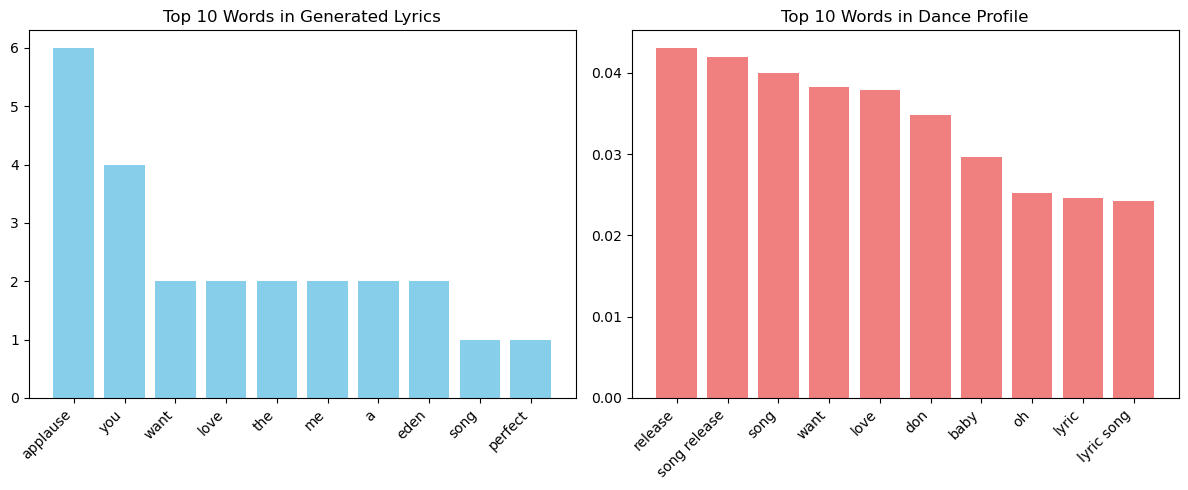

Generating lyrics for genre: Dance, target length: 50
Sample 2: Genre Similarity=0.154, Diversity=0.800, Description Relevance=0.074
Generating lyrics for genre: Dance, target length: 50
Sample 3: Genre Similarity=0.153, Diversity=0.860, Description Relevance=0.060
Generating lyrics for genre: Dance, target length: 50
Sample 4: Genre Similarity=0.141, Diversity=0.840, Description Relevance=0.067
Generating lyrics for genre: Dance, target length: 50
Sample 5: Genre Similarity=0.161, Diversity=0.820, Description Relevance=0.112


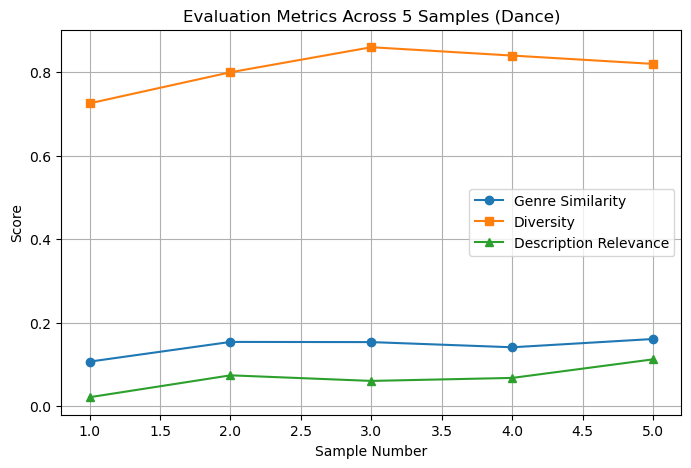

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

# Evaluation class to assess TFIDFLyricsGenerator performance
class LyricsEvaluator:
    def __init__(self, generator):
        """
        Initialize evaluator with a trained TFIDFLyricsGenerator instance.
        
        Args:
            generator: Trained TFIDFLyricsGenerator instance
        """
        self.generator = generator
        print("Lyrics Evaluator initialized!")

    def evaluate_genre_similarity(self, lyrics, genre):
        """Calculate cosine similarity between generated lyrics and genre profile."""
        if genre not in self.generator.genre_profiles:
            genre = list(self.generator.genre_profiles.keys())[0]
            print(f"Genre not found for evaluation, defaulting to {genre}")
        lyrics_vec = self.generator.vectorizer.transform([lyrics])
        genre_profile = self.generator.genre_profiles[genre]
        genre_vec = np.zeros((1, len(self.generator.feature_names)))
        for word, score in genre_profile.items():
            if word in self.generator.vectorizer.vocabulary_:
                idx = self.generator.vectorizer.vocabulary_[word]
                genre_vec[0, idx] = score
        similarity = cosine_similarity(lyrics_vec, genre_vec)[0][0]
        return similarity

    def evaluate_description_relevance(self, lyrics, description):
        """Calculate cosine similarity between generated lyrics and input description."""
        if not description:
            return 0.0
        lyrics_vec = self.generator.vectorizer.transform([lyrics])
        desc_vec = self.generator.vectorizer.transform([description])
        similarity = cosine_similarity(lyrics_vec, desc_vec)[0][0]
        return similarity

    def evaluate_diversity(self, lyrics):
        """Calculate diversity as ratio of unique words to total words in lyrics."""
        words = lyrics.split()
        if not words:
            return 0.0
        unique_words = len(set(words))
        total_words = len(words)
        return unique_words / total_words

    def plot_top_words_comparison(self, lyrics, genre, top_n=10):
        """Plot top words in generated lyrics vs genre profile."""
        if genre not in self.generator.genre_profiles:
            genre = list(self.generator.genre_profiles.keys())[0]
            print(f"Genre not found for plotting, defaulting to {genre}")
        
        # Top words in generated lyrics
        lyrics_words = lyrics.split()
        lyrics_counter = Counter(lyrics_words)
        lyrics_top = dict(sorted(lyrics_counter.items(), key=lambda x: x[1], reverse=True)[:top_n])
        
        # Top words in genre profile
        genre_profile = self.generator.genre_profiles[genre]
        genre_top = dict(sorted(genre_profile.items(), key=lambda x: x[1], reverse=True)[:top_n])
        
        # Plotting
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        ax1.bar(lyrics_top.keys(), lyrics_top.values(), color='skyblue')
        ax1.set_title(f'Top {top_n} Words in Generated Lyrics')
        ax1.set_xticklabels(lyrics_top.keys(), rotation=45, ha='right')
        ax2.bar(genre_top.keys(), genre_top.values(), color='lightcoral')
        ax2.set_title(f'Top {top_n} Words in {genre} Profile')
        ax2.set_xticklabels(genre_top.keys(), rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def evaluate_multiple_samples(self, genre, target_length, description="", num_samples=5):
        """Generate and evaluate multiple samples for consistency."""
        similarities = []
        diversities = []
        desc_relevances = []
        print(f"Generating and evaluating {num_samples} samples for genre: {genre}")
        for i in range(num_samples):
            lyrics = self.generator.generate_lyrics(genre, target_length, description)
            sim = self.evaluate_genre_similarity(lyrics, genre)
            div = self.evaluate_diversity(lyrics)
            desc_rel = self.evaluate_description_relevance(lyrics, description)
            similarities.append(sim)
            diversities.append(div)
            desc_relevances.append(desc_rel)
            print(f"Sample {i+1}: Genre Similarity={sim:.3f}, Diversity={div:.3f}, Description Relevance={desc_rel:.3f}")
            if i == 0:  # Plot top words for the first sample
                self.plot_top_words_comparison(lyrics, genre)
        
        # Plot similarity across samples
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, num_samples+1), similarities, marker='o', label='Genre Similarity')
        plt.plot(range(1, num_samples+1), diversities, marker='s', label='Diversity')
        if description:
            plt.plot(range(1, num_samples+1), desc_relevances, marker='^', label='Description Relevance')
        plt.xlabel('Sample Number')
        plt.ylabel('Score')
        plt.title(f'Evaluation Metrics Across {num_samples} Samples ({genre})')
        plt.legend()
        plt.grid(True)
        plt.show()
        return similarities, diversities, desc_relevances

# Usage example for evaluation (run after training your generator)
try:
    evaluator = LyricsEvaluator(generator)  # Assuming 'generator' is your trained TFIDFLyricsGenerator instance
    # Evaluate multiple samples for a specific genre
    genre = "Dance"
    target_length = 50
    description = "A song about heartbreak"
    evaluator.evaluate_multiple_samples(genre, target_length, description, num_samples=5)
except NameError:
    print("Error: 'generator' is not defined. Please ensure your TFIDFLyricsGenerator is initialized and trained.")
except Exception as e:
    print(f"An error occurred: {e}")

In [82]:
def evaluate_genre_similarity(self, generated_lyrics, genre):
    # Vectorize the generated lyrics
    lyrics_vec = self.vectorizer.transform([generated_lyrics])
    # Get genre profile as a vector (mean of top words or similar)
    profile = self.genre_profiles.get(genre, {})
    if not profile:
        return 0.0
    # Create a vector for the genre profile based on top words
    profile_vec = np.zeros((1, len(self.feature_names)))
    for word, score in profile.items():
        if word in self.feature_names:
            idx = np.where(self.feature_names == word)[0][0]
            profile_vec[0, idx] = score
    # Compute cosine similarity
    similarity = cosine_similarity(lyrics_vec, profile_vec)[0][0]
    return similarity

In [83]:
# import numpy as np
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# def compute_cosine_similarity(df, text_column='Lemmatized_Text', description="A song about love and heartbreak", top_n=5):
#     """
#     Compute cosine similarity between a description and songs in a DataFrame using TF-IDF.
    
#     Args:
#         df: DataFrame containing lyrics data.
#         text_column: Column name in DataFrame with lyrics text (default: 'Lemmatized_Text').
#         description: Text description to compare against songs (default: a love/heartbreak theme).
#         top_n: Number of top similar songs to return (default: 5).
#     Returns:
#         List of tuples with (song_index, similarity_score, lyrics_snippet) for top similar songs.
#     """
#     print("Setting up TF-IDF vectorizer...")
#     # Initialize TF-IDF vectorizer
#     vectorizer = TfidfVectorizer(
#         max_features=5000,  # Limit to top 5000 features
#         min_df=2,           # Ignore terms in fewer than 2 documents
#         max_df=0.8,        # Ignore terms in more than 80% of documents
#         ngram_range=(1, 2), # Use unigrams and bigrams
#         stop_words='english',
#         lowercase=True
#     )
    
#     # Prepare text data from DataFrame, filling missing values with empty string
#     text_data = df[text_column].fillna('')
#     print(f"Processing {len(text_data)} songs from {text_column} column...")
    
#     # Transform lyrics into TF-IDF matrix
#     tfidf_matrix = vectorizer.fit_transform(text_data)
#     print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
    
#     # Transform the description into a TF-IDF vector using the same vectorizer
#     desc_vec = vectorizer.transform([description])
#     print("Computing cosine similarity between description and songs...")
    
#     # Calculate cosine similarity between description and all songs
#     similarities = cosine_similarity(desc_vec, tfidf_matrix)[0]
    
#     # Get indices of top N most similar songs (sorted by similarity descending)
#     top_indices = similarities.argsort()[-top_n:][::-1]
    
#     # Prepare results with song index, similarity score, and a snippet of lyrics
#     results = []
#     for idx in top_indices:
#         score = similarities[idx]
#         # Get a snippet of lyrics (first 10 words or less)
#         lyrics = text_data.iloc[idx]
#         snippet = " ".join(lyrics.split()[:10]) + ("..." if len(lyrics.split()) > 10 else "")
#         results.append((idx, score, snippet))
    
#     print(f"Top {top_n} most similar songs to description '{description}':")
#     for idx, score, snippet in results:
#         print(f"Song Index: {idx}, Similarity Score: {score:.3f}, Lyrics Snippet: {snippet}")
    
#     return results

# # Usage example
# # Assuming filtered_df is already loaded with your data
# if __name__ == "__main__":
#     try:
#         # Run cosine similarity computation
#         results = compute_cosine_similarity(
#             df=filtered_df,
#             text_column='Lemmatized_Text',
#             description="A song about love and heartbreak",
#             top_n=5
#         )
#     except NameError:
#         print("Error: 'filtered_df' is not defined. Please ensure your DataFrame is loaded.")
#     except KeyError:
#         print("Error: Specified text column not found in DataFrame. Check column name.")

In [84]:
# import matplotlib.pyplot as plt

# def plot_genre_word_usage(generator, genre, generated_lyrics):
#     profile = generator.genre_profiles.get(genre, {})
#     top_words = list(profile.keys())[:10]  # Top 10 words for the genre
#     lyrics_words = generated_lyrics.lower().split()
#     word_freq = {word: lyrics_words.count(word) for word in top_words}
    
#     plt.bar(word_freq.keys(), word_freq.values())
#     plt.title(f"Frequency of Top {genre} Words in Generated Lyrics")
#     plt.xlabel("Words")
#     plt.ylabel("Frequency")
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # Usage after generating lyrics
# plot_genre_word_usage(generator, "Pop", generated_lyrics)

### Markov Chain Model

In [85]:
# Imports specific to Markov Chain model
from collections import defaultdict
import random

class MarkovLyricsGenerator:
    def __init__(self):
        self.transitions = defaultdict(lambda: defaultdict(int))
        self.genre_transitions = {}
        print("Markov Chain Lyrics Generator initialized!")

    def train(self, df, genre_columns=None):
        print("Training Markov Chain model...")
        if genre_columns is None:
            genre_columns = ['Pop', 'Hip_Hop', 'R&B', 'Rap', 'Country', 'Dance', 'Alternative']
        
        for genre in genre_columns:
            if genre in df.columns:
                genre_mask = df[genre] == 1
                if genre_mask.sum() > 20:
                    genre_texts = df[genre_mask]['Lemmatized_Text'].tolist()
                    transitions = defaultdict(lambda: defaultdict(int))
                    for text in genre_texts:
                        if pd.notna(text):
                            words = text.split()
                            for i in range(len(words) - 1):
                                current = words[i].lower()
                                next_word = words[i + 1].lower()
                                transitions[current][next_word] += 1
                    self.genre_transitions[genre] = transitions
        print("Markov Chain training complete!")

    def generate_lyrics(self, genre, target_length, start_word="", description=""):
        print(f"Generating lyrics with Markov Chain for genre: {genre}, target length: {target_length}")
        if genre not in self.genre_transitions:
            genre = list(self.genre_transitions.keys())[0]
            print(f"Genre not found, defaulting to {genre}")

        transitions = self.genre_transitions[genre]
        if not start_word or start_word.lower() not in transitions:
            start_word = random.choice(list(transitions.keys()))

        lyrics = [start_word.lower()]
        while len(lyrics) < target_length:
            last_word = lyrics[-1]
            next_words = transitions.get(last_word, {})
            if not next_words:
                break
            total = sum(next_words.values())
            next_word = random.choices(
                list(next_words.keys()), 
                weights=[count/total for count in next_words.values()],
                k=1
            )[0]
            lyrics.append(next_word)
        
        if description:
            desc_words = description.lower().split()
            for word in desc_words:
                if word in transitions:
                    lyrics.insert(min(len(lyrics), target_length//2), word)
                    break
        
        lyrics = lyrics[:target_length]
        return " ".join(lyrics)

# Usage
markov_gen = MarkovLyricsGenerator()
markov_gen.train(filtered_df)
markov_lyrics = markov_gen.generate_lyrics(genre="Dance", target_length=50, start_word="yo", description="A song about heartbreak")
print("Generated Lyrics (Markov Chain):")
print(markov_lyrics)

Markov Chain Lyrics Generator initialized!
Training Markov Chain model...
Markov Chain training complete!
Generating lyrics with Markov Chain for genre: Dance, target length: 50
Generated Lyrics (Markov Chain):
yo dextro one more you won't stay and we drink strong female do what you don't be can try oh ohoh yeah youve be hook a lady gaga can say it wrong i don't stop callin' cause your hip just be and you're go to any long i'm a show


### Word Cloud Visualization for Lyrics

In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


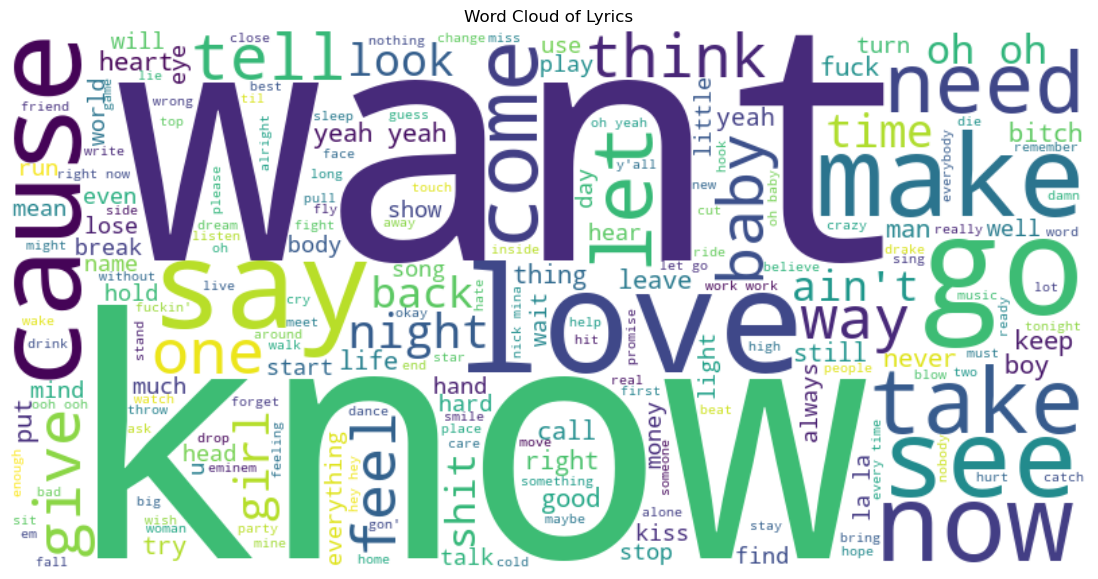

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use the cleaned/lemmatized lyrics column
text = ' '.join(filtered_df['Lemmatized_Text'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lyrics')
plt.show()

### Bar Plot for Genre Distribution

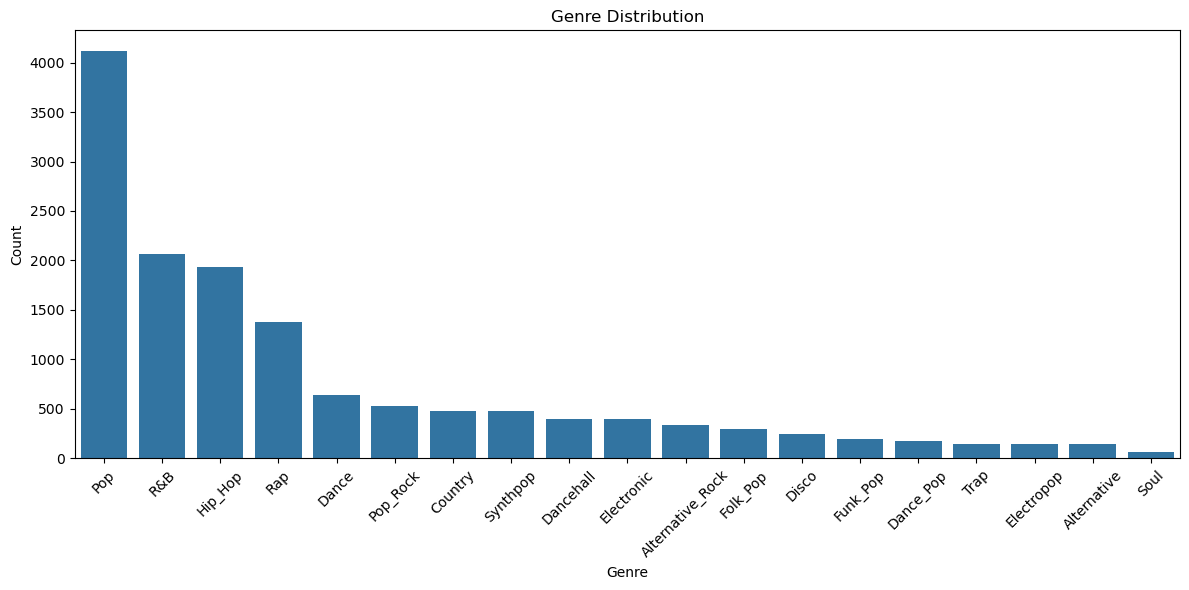

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sum the values in each genre column to get song counts per genre
genre_counts = genre_df.sum().sort_values(ascending=False)

# Convert to DataFrame for Seaborn
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Count', data=genre_counts_df)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## LSTM Model

In [87]:
pip install tensorflow

## Tokenization and Sequence Generation for LSTM Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Use the lemmatized text for better results
lyrics = filtered_df['Lemmatized_Text'].dropna().astype(str).tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(lyrics)
total_words = len(tokenizer.word_index) + 1

# Set a fixed max sequence length
MAX_SEQUENCE_LEN = 20 

# Generate input sequences for LSTM
input_sequences = []
for line in lyrics:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(2, min(len(token_list)+1, MAX_SEQUENCE_LEN+1)):
        n_gram_sequence = token_list[:i]
        input_sequences.append(n_gram_sequence)

# Pad sequences
input_sequences = pad_sequences(input_sequences, maxlen=MAX_SEQUENCE_LEN, padding='pre')

# (Optional) If you still have too many sequences, sample a subset
# import random
# if len(input_sequences) > 100000:
#     input_sequences = np.array(random.sample(list(input_sequences), 100000))

# Split into predictors and label
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

MemoryError: Unable to allocate 16.0 GiB for an array with shape (106328, 20236) and data type float64

LSTM Lyrics Generator initialized!
Training LSTM model...
Training LSTM for Alternative with 22897 training samples and 5725 validation samples
Epoch 1/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 45s 51ms/step - loss: 6.3565 - val_loss: 5.5793
Epoch 2/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 54s 75ms/step - loss: 5.5233 - val_loss: 5.4298
Epoch 3/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 88s 83ms/step - loss: 5.3288 - val_loss: 5.2809
Epoch 4/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 68s 95ms/step - loss: 5.1350 - val_loss: 5.1155
Epoch 5/5
716/716 ━━━━━━━━━━━━━━━━━━━━ 61s 85ms/step - loss: 4.9379 - val_loss: 4.9225
Completed training LSTM for Alternative


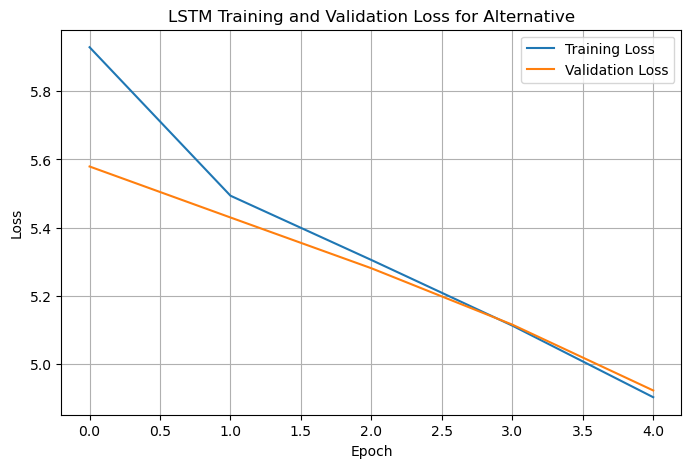

Training LSTM for Alternative_Rock with 49617 training samples and 12405 validation samples
Epoch 1/5
  77/1551 ━━━━━━━━━━━━━━━━━━━━ 1:34 64ms/step - loss: 7.8822

KeyboardInterrupt: 

In [ ]:
# # Imports specific to LSTM model (already in your code)
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# import numpy as np
# import matplotlib.pyplot as plt

# class LSTMLyricsGenerator:
#     def __init__(self, max_words=5000, max_len=50):
#         self.max_words = max_words
#         self.max_len = max_len
#         self.tokenizer = Tokenizer(num_words=max_words, lower=True)
#         self.model = None
#         self.genre_models = {}
#         print("LSTM Lyrics Generator initialized!")

#     def prepare_data(self, texts):
#         self.tokenizer.fit_on_texts(texts)
#         sequences = self.tokenizer.texts_to_sequences(texts)
#         X, y = [], []
#         for seq in sequences:
#             for i in range(1, len(seq)):
#                 X.append(seq[:i])
#                 y.append(seq[i])
#         X = pad_sequences(X, maxlen=self.max_len)
#         y = np.array(y)
#         return X, y

#     def train(self, df, genre_columns=None, epochs=5, batch_size=32, validation_split=0.2):
#         print("Training LSTM model...")
#         if genre_columns is None:
#             genre_columns = genre_df.columns.tolist()
        
#         for genre in genre_columns:
#             if genre in df.columns:
#                 genre_mask = df[genre] == 1
#                 if genre_mask.sum() > 50:
#                     genre_texts = df[genre_mask]['Lemmatized_Text'].dropna().tolist()
#                     X, y = self.prepare_data(genre_texts)
#                     if len(X) > 0:
#                         # Split data into training and validation sets
#                         X_train, X_val, y_train, y_val = train_test_split(
#                             X, y, test_size=validation_split, random_state=42
#                         )
#                         print(f"Training LSTM for {genre} with {len(X_train)} training samples and {len(X_val)} validation samples")
                        
#                         model = Sequential([
#                             Embedding(self.max_words, 100, input_length=self.max_len),
#                             LSTM(128, return_sequences=True),
#                             Dropout(0.2),
#                             LSTM(64),
#                             Dense(self.max_words, activation='softmax')
#                         ])
#                         model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
                        
#                         # Train with verbose=1 to show epoch-by-epoch progress
#                         history = model.fit(
#                             X_train, y_train,
#                             validation_data=(X_val, y_val),
#                             epochs=epochs,
#                             batch_size=batch_size,
#                             verbose=1  # Changed from 0 to 1 to display epochs
#                         )
#                         self.genre_models[genre] = model
#                         print(f"Completed training LSTM for {genre}")
                        
#                         # Plot training history for this genre
#                         self.plot_training_history(history, genre)
#         print("LSTM training complete!")

#     def plot_training_history(self, history, genre):
#         plt.figure(figsize=(8, 5))
#         plt.plot(history.history['loss'], label='Training Loss')
#         plt.plot(history.history['val_loss'], label='Validation Loss')
#         plt.title(f'LSTM Training and Validation Loss for {genre}')
#         plt.xlabel('Epoch')
#         plt.ylabel('Loss')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

#     def generate_lyrics(self, genre, target_length, seed_text="", description=""):
#         if genre not in self.genre_models:
#             genre = list(self.genre_models.keys())[0]
#             print(f"Genre not found, defaulting to {genre}")

#         model = self.genre_models[genre]
#         if not seed_text:
#             seed_text = random.choice(list(self.tokenizer.word_index.keys()))
        
#         seed_seq = self.tokenizer.texts_to_sequences([seed_text])[0]
#         lyrics = seed_seq[:]
        
#         if description:
#             desc_seq = self.tokenizer.texts_to_sequences([description])[0]
#             if desc_seq:
#                 lyrics.extend(desc_seq[:5])
        
#         for _ in range(target_length - len(lyrics)):
#             padded_seq = pad_sequences([lyrics[-self.max_len:]], maxlen=self.max_len)
#             predicted = model.predict(padded_seq, verbose=0)
#             predicted_word_idx = np.argmax(predicted[0])
#             if predicted_word_idx > 0:
#                 lyrics.append(predicted_word_idx)
#             else:
#                 break
        
#         lyrics = lyrics[:target_length]
#         words = [word for idx in lyrics for word, index in self.tokenizer.word_index.items() if index == idx]
#         return " ".join(words)

# # Usage
# lstm_gen = LSTMLyricsGenerator()
# lstm_gen.train(filtered_df)  # Specify number of epochs, can adjust as needed


In [101]:
lstm_lyrics = lstm_gen.generate_lyrics(genre="Alternative", target_length=250, seed_text="Love is a journey we travel together", description="A song about love")
print("Generated Lyrics (LSTM):")
print(lstm_lyrics)

Generated Lyrics (LSTM):
love a we travel together a song about love you oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i oh of i


In [88]:
# # Imports specific to LSTM model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# class LSTMLyricsGenerator:
#     def __init__(self, max_words=5000, max_len=50):
#         self.max_words = max_words
#         self.max_len = max_len
#         self.tokenizer = Tokenizer(num_words=max_words, lower=True)
#         self.model = None
#         self.genre_models = {}
#         print("LSTM Lyrics Generator initialized!")

#     def prepare_data(self, texts):
#         self.tokenizer.fit_on_texts(texts)
#         sequences = self.tokenizer.texts_to_sequences(texts)
#         X, y = [], []
#         for seq in sequences:
#             for i in range(1, len(seq)):
#                 X.append(seq[:i])
#                 y.append(seq[i])
#         X = pad_sequences(X, maxlen=self.max_len)
#         y = np.array(y)
#         return X, y

#     def train(self, df, genre_columns=None):
#         print("Training LSTM model...")
#         if genre_columns is None:
#             genre_columns = ['Pop', 'Hip_Hop', 'R&B', 'Rap', 'Country', 'Dance', 'Alternative']
        
#         for genre in genre_columns:
#             if genre in df.columns:
#                 genre_mask = df[genre] == 1
#                 if genre_mask.sum() > 50:
#                     genre_texts = df[genre_mask]['Lemmatized_Text'].dropna().tolist()
#                     X, y = self.prepare_data(genre_texts)
#                     if len(X) > 0:
#                         model = Sequential([
#                             Embedding(self.max_words, 100, input_length=self.max_len),
#                             LSTM(128, return_sequences=True),
#                             Dropout(0.2),
#                             LSTM(64),
#                             Dense(self.max_words, activation='softmax')
#                         ])
#                         model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
#                         model.fit(X, y, epochs=5, batch_size=32, verbose=0)
#                         self.genre_models[genre] = model
#                         print(f"Trained LSTM for {genre}")
#         print("LSTM training complete!")

#     def generate_lyrics(self, genre, target_length, seed_text="", description=""):
#         if genre not in self.genre_models:
#             genre = list(self.genre_models.keys())[0]
#             print(f"Genre not found, defaulting to {genre}")

#         model = self.genre_models[genre]
#         if not seed_text:
#             seed_text = random.choice(list(self.tokenizer.word_index.keys()))
        
#         seed_seq = self.tokenizer.texts_to_sequences([seed_text])[0]
#         lyrics = seed_seq[:]
        
#         if description:
#             desc_seq = self.tokenizer.texts_to_sequences([description])[0]
#             if desc_seq:
#                 lyrics.extend(desc_seq[:5])
        
#         for _ in range(target_length - len(lyrics)):
#             padded_seq = pad_sequences([lyrics[-self.max_len:]], maxlen=self.max_len)
#             predicted = model.predict(padded_seq, verbose=0)
#             predicted_word_idx = np.argmax(predicted[0])
#             if predicted_word_idx > 0:
#                 lyrics.append(predicted_word_idx)
#             else:
#                 break
        
#         lyrics = lyrics[:target_length]
#         words = [word for idx in lyrics for word, index in self.tokenizer.word_index.items() if index == idx]
#         return " ".join(words)

# # Usage
# lstm_gen = LSTMLyricsGenerator()
# lstm_gen.train(filtered_df)
# lstm_lyrics = lstm_gen.generate_lyrics(genre="Rap", target_length=50, seed_text="start", description="A song about struggle")
# print("Generated Lyrics (LSTM):")
# print(lstm_lyrics)

LSTM Lyrics Generator initialized!
Training LSTM model...


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


KeyboardInterrupt: 

## Fine-Tune a GPT Model

In [108]:
pip install transformers

   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.8 MB 4.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/10.8 MB 5.9 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/10.8 MB 5.4 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/10.8 MB 5.8 MB/s eta 0:00:02
   ---------------------- ----------------- 6.0/10.8 MB 6.2 MB/s eta 0:00:01
   -------------------------- ------------- 7.1/10.8 MB 6.1 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/10.8 MB 6.2 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/10.8 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------  10.7/10.8 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 10.8/10.8 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   -------------------- ------------------- 1.3/2.5 MB 5.6 MB/s eta 0:00:01
   ---------

In [110]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [112]:
pip install torch


   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/216.1 MB 4.2 MB/s eta 0:00:51
   ---------------------------------------- 1.3/216.1 MB 4.8 MB/s eta 0:00:45
   ---------------------------------------- 2.6/216.1 MB 4.9 MB/s eta 0:00:44
    --------------------------------------- 3.1/216.1 MB 4.4 MB/s eta 0:00:49
    --------------------------------------- 4.7/216.1 MB 5.0 MB/s eta 0:00:43
   - -------------------------------------- 6.0/216.1 MB 5.3 MB/s eta 0:00:40
   - -------------------------------------- 7.1/216.1 MB 5.4 MB/s eta 0:00:39
   - -------------------------------------- 7.9/216.1 MB 5.2 MB/s eta 0:00:41
   - -------------------------------------- 8.9/216.1 MB 5.1 MB/s eta 0:00:41
   - -------------------------------------- 10.2/216.1 MB 5.1 MB/s eta 0:00:41
   -- ------------------------------------- 11.3/216.1 MB 5.2 MB/s eta 0:00:40
   -- ------------------------------------- 12.6/216.1 MB 5.2 MB/s e

In [1]:
# %pip install torch

# from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments
# from datasets import Dataset
# import pandas as pd

# class GPTLyricsGenerator:
#     def __init__(self, model_name="gpt2"):
#         self.tokenizer = GPT2Tokenizer.from_pretrained(model_name)
#         self.model = GPT2LMHeadModel.from_pretrained(model_name)
#         self.genre_models = {}
#         print("GPT Lyrics Generator initialized!")

#     def prepare_dataset(self, texts):
#         dataset = Dataset.from_dict({"text": texts})
#         def tokenize_function(examples):
#             return self.tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)
#         return dataset.map(tokenize_function, batched=True)

#     def train(self, df, genre_columns=None):
#         print("Fine-tuning GPT model...")
#         if genre_columns is None:
#             genre_columns = ['Pop', 'Hip_Hop', 'R&B', 'Rap', 'Country', 'Dance', 'Alternative']
        
#         for genre in genre_columns:
#             if genre in df.columns:
#                 genre_mask = df[genre] == 1
#                 if genre_mask.sum() > 50:  # Minimum songs for fine-tuning
#                     genre_texts = df[genre_mask]['Lemmatized_Text'].dropna().tolist()
#                     dataset = self.prepare_dataset(genre_texts)
#                     training_args = TrainingArguments(
#                         output_dir=f"./gpt2_{genre}",
#                         overwrite_output_dir=True,
#                         num_train_epochs=3,
#                         per_device_train_batch_size=4,
#                         save_steps=10_000,
#                         save_total_limit=2,
#                     )
#                     trainer = Trainer(
#                         model=self.model,
#                         args=training_args,
#                         train_dataset=dataset,
#                     )
#                     trainer.train()
#                     self.genre_models[genre] = self.model
#                     print(f"Fine-tuned GPT for {genre}")
#         print("GPT fine-tuning complete!")

#     def generate_lyrics(self, genre, target_length, prompt="", description=""):
#         if genre not in self.genre_models:
#             genre = list(self.genre_models.keys())[0]
#             print(f"Genre not found, defaulting to {genre}")

#         model = self.genre_models[genre]
#         if not prompt:
#             prompt = "Start of a song"
#         if description:
#             prompt += f" about {description}"
        
#         inputs = self.tokenizer.encode(prompt, return_tensors="pt")
#         outputs = model.generate(inputs, max_length=target_length, num_return_sequences=1, no_repeat_ngram_size=2)
#         lyrics = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
#         return lyrics

# # Usage example
# gpt_gen = GPTLyricsGenerator()
# gpt_gen.train(filtered_df)
# generated_lyrics = gpt_gen.generate_lyrics(genre="Country", target_length=100, prompt="Once upon a time", description="a lonely cowboy")
# print("Generated Lyrics (GPT):")
# print(generated_lyrics)

<!-- # Imports specific to GPT model
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments
from datasets import Dataset

class GPTLyricsGenerator:
    def __init__(self, model_name="gpt2"):
        self.tokenizer = GPT2Tokenizer.from_pretrained(model_name)
        self.model = GPT2LMHeadModel.from_pretrained(model_name)
        self.genre_models = {}
        print("GPT Lyrics Generator initialized!")

    def prepare_dataset(self, texts):
        dataset = Dataset.from_dict({"text": texts})
        def tokenize_function(examples):
            return self.tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)
        return dataset.map(tokenize_function, batched=True)

    def train(self, df, genre_columns=None):
        print("Fine-tuning GPT model...")
        if genre_columns is None:
            genre_columns = ['Pop', 'Hip_Hop', 'R&B', 'Rap', 'Country', 'Dance', 'Alternative']
        
        for genre in genre_columns:
            if genre in df.columns:
                genre_mask = df[genre] == 1
                if genre_mask.sum() > 50:
                    genre_texts = df[genre_mask]['Lemmatized_Text'].dropna().tolist()
                    dataset = self.prepare_dataset(genre_texts)
                    training_args = TrainingArguments(
                        output_dir=f"./gpt2_{genre}",
                        overwrite_output_dir=True,
                        num_train_epochs=3,
                        per_device_train_batch_size=4,
                        save_steps=10_000,
                        save_total_limit=2,
                    )
                    trainer = Trainer(
                        model=self.model,
                        args=training_args,
                        train_dataset=dataset,
                    )
                    trainer.train()
                    self.genre_models[genre] = self.model
                    print(f"Fine-tuned GPT for {genre}")
        print("GPT fine-tuning complete!")

    def generate_lyrics(self, genre, target_length, prompt="", description=""):
        if genre not in self.genre_models:
            genre = list(self.genre_models.keys())[0]
            print(f"Genre not found, defaulting to {genre}")

        model = self.genre_models[genre]
        if not prompt:
            prompt = "Start of a song"
        if description:
            prompt += f" about {description}"
        
        inputs = self.tokenizer.encode(prompt, return_tensors="pt")
        outputs = model.generate(inputs, max_length=target_length, num_return_sequences=1, no_repeat_ngram_size=2)
        lyrics = self.tokenizer.decode(outputs[0], skip_special_tokens=True)
        return lyrics

# Usage
gpt_gen = GPTLyricsGenerator()
gpt_gen.train(filtered_df)
gpt_lyrics = gpt_gen.generate_lyrics(genre="Country", target_length=100, prompt="Once upon a time", description="a lonely cowboy")
print("Generated Lyrics (GPT):")
print(gpt_lyrics) -->